# ML project with Django

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [3]:
#import data from seaborn of tips dataset
df = sns.load_dataset('tips')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
os.makedirs('./data', exist_ok=True)

In [5]:
# save the dataset to a csv file
df.to_csv('./data/tips.csv', index=False)   

In [6]:
# split te data into features and target
X = df.drop('tip', axis=1) #features
y = df['tip'] #target


In [7]:
# feature encoding using sklearn methods
le = LabelEncoder()

#encode sex, smoker, day, time columns
X["sex"] = le.fit_transform(X["sex"])
X["smoker"] = le.fit_transform(X["smoker"])
X["day"] = le.fit_transform(X["day"])
X["time"] = le.fit_transform(X["time"])


In [8]:
# split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# train the model using XGBoost
rf_model = RandomForestRegressor()


# fit the model
rf_model.fit(X_train, y_train)



,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


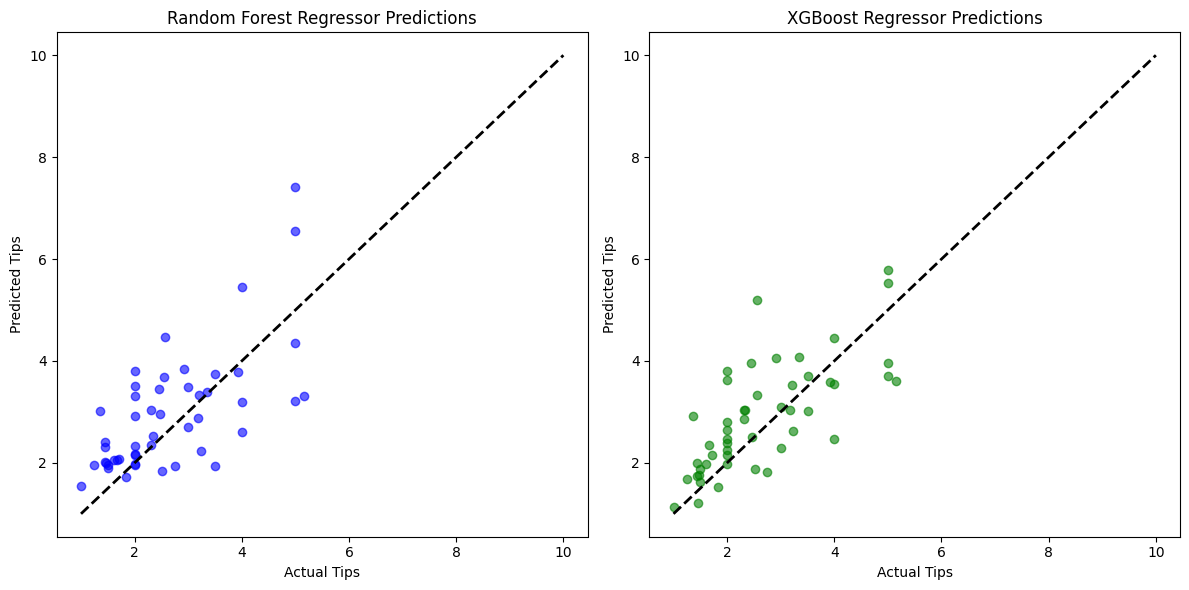

In [11]:

# make predictions
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

#plot

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('Random Forest Regressor Predictions')

plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_predictions, color='green', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title('XGBoost Regressor Predictions')

plt.tight_layout()
plt.show()

In [12]:
# validate the models based on the matrics

# Random Forest Regressor metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regressor Metrics:")
print(f"Mean Absolute Error: {rf_mae}")
print(f"Mean Squared Error: {rf_mse}")
print(f"R^2 Score: {rf_r2}")


# XGBoost Regressor metrics
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("\nXGBoost Regressor Metrics:")
print(f"Mean Absolute Error: {xgb_mae}")
print(f"Mean Squared Error: {xgb_mse}")
print(f"R^2 Score: {xgb_r2}")





Random Forest Regressor Metrics:
Mean Absolute Error: 0.7813346938775512
Mean Squared Error: 0.9716914906122464
R^2 Score: 0.2226289872267615

XGBoost Regressor Metrics:
Mean Absolute Error: 0.6721697168934103
Mean Squared Error: 0.7389215578875857
R^2 Score: 0.40884920227805865


In [13]:
# we will move forwrd with XgBoost model
# save the model

# create the model directory
os.makedirs('./model', exist_ok=True)

joblib.dump(xgb_model, './model/xgb_model.pkl')

['./model/xgb_model.pkl']

In [16]:
#chekc the predictions from model

xgb_model.predict([[1,1,0,3,4,3]])


array([2.1854937], dtype=float32)